# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work
### (5 Marks)

*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Katia | Abdul Baki | Katia Abdul Baki,2024-09-27 | 7 | 25% |
| Member 2: | Malay | Mistry | Malay Mistry,2024-09-27 | 7 | 25% |
| Member 3: | Pratham | Rami | Pratham Rami,2024-09-27 | 7 | 25% |
| Member 4: | Vasu | Shah | Vasu Shah,2024-09-27 | 7 | 25% |


## Part 1: Printing to the Console
### (6 Marks)

In [ ]:
# In the space below, please print "Hello, World! Welcome to the Student Gradebook Management System."
# (1 mark)
print("Hello, World! Welcome to the Student Gradebook Management System.")

Hello, World! Welcome to the Student Gradebook Management System.


In [ ]:
# Fill in your information using the defined variables below:
# (1 mark)
lab_group_number ="1"
intake_year ="2024"
intake_semester = "Fall" #"Fall" or "Winter"

# Using f-strings and the variables above, print "This is implemented by Group <lab_group_number>, for ENGG680 <intake_semester> of <intake_year>"
# (2 marks)
print("This is implemented by Group", lab_group_number, "for ENGG680", intake_semester, "of", intake_year)

This is implemented by Group 1 for ENGG680 Fall of 2024


In [ ]:
# Use indexing to print "The subjects involved in this grading system is English and Math." using "subjects" below.
# (2 marks)
subjects = ("English", "Math")
print ("The subjects involved in this grading system is", subjects[0], "and", subjects[1])

The subjects involved in this grading system is English and Math


## Part 2: Using Pandas for Data Management and Analytics
### (20 marks)

In [ ]:
# In the space below, please import the Pandas library
# (1 mark)
import pandas as pd

In [ ]:
# Load the student grade CSV files into DataFrames using the defined variables
# (2 marks)
from google.colab import drive
drive.mount('/content/drive')
df_english = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentGrades_English.csv')
df_math = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentGrades_Math.csv')
print(df_english)
print(df_math)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   firstName  lastName  studentID  grade
0       Emma     Smith      10959     95
1     Sophia  Robinson      75175     88
2       Emma    Taylor      42257     87
3      David  Robinson      55148     86
4    Stephen     Curry      30303     90
5   Isabella  Thompson      72824     88
6    Jasmine     Smith      70385     84
7      James     Jones      87707     76
8      Sarah     Swift      61026     80
9       Anne     Clark      90449     82
10      Ryan    Thomas      62137     92
11    Daniel     White      25477     91
12      Sara       Doe      47991     98
13   Matthew     White      25376     80
   firstName  lastName  studentID  grade
0      James     Jones      87707     92
1      Sarah     Swift      61026     98
2       Anne     Clark      90449     99
3       Ryan    Thomas      62137     89
4     Daniel     White      25477     87
5       Sa

In [ ]:
# Merging the DataFrames on 'studentID'
df_studentGrades = pd.merge(df_english, df_math, on='studentID', suffixes=('_English', '_Math'))

In [ ]:
# Take a look at the data contained in the csv files. Why is studentID chosen as the key?
# (1 mark)
#It acts as a link between the two grades.

In [ ]:
# Let's calculate the average GPA across the two classes for each student
df_studentGrades['GPA'] = df_studentGrades[['grade_English', 'grade_Math']].mean(axis=1)

# Now let's check the data! In the space below, please use the .head method to display the dataframe.
# (1 mark)
df_studentGrades.head()

,firstName_English,lastName_English,studentID,grade_English,firstName_Math,lastName_Math,grade_Math,GPA
0,Emma,Smith,10959,95,Emma,Smith,90,92.5
1,Sophia,Robinson,75175,88,Sophia,Robinson,95,91.5
2,Emma,Taylor,42257,87,Emma,Taylor,85,86.0
3,David,Robinson,55148,86,David,Robinson,87,86.5
4,Stephen,Curry,30303,90,Stephen,Curry,88,89.0


In [ ]:
# Do you notice a problem? The rows for first name and last name have been duplicated!
# .drop(columns=['<column_name1>','<column_name2>'] is a Pandas method that can be used to drop columns.
# In the space below, drop the first name and last name associated with the math .csv file.
# (2 mark)
df_studentGrades = df_studentGrades.drop(columns=['firstName_Math', 'lastName_Math'])

In [ ]:
# Let's display the data again. Use an appropriate method (hint: already used before)
# (1 mark)
df_studentGrades.head()

,firstName_English,lastName_English,studentID,grade_English,grade_Math,GPA
0,Emma,Smith,10959,95,90,92.5
1,Sophia,Robinson,75175,88,95,91.5
2,Emma,Taylor,42257,87,85,86.0
3,David,Robinson,55148,86,87,86.5
4,Stephen,Curry,30303,90,88,89.0


In [ ]:
# Let's also rename the first and last names appropriately.
# Complete the code in the space below by replacing "<>" with the proper column name
# (1 mark)

df_studentGrades = df_studentGrades.rename(columns={
    'firstName_English': 'firstName',
    'lastName_English': 'lastName',
    'grade_english': 'englishGrade',
    'grade_math': 'mathGrade'
    })

In [ ]:
# Now let's find out some statistics about our student grades!
# Please use an appropriate Pandas method in the space below to display statistical values like
# mean, standard deviation, min, max, and others.
# (1 mark)
df_studentGrades.describe()

,studentID,grade_English,grade_Math,GPA
count,14.000000,14.000000,14.000000,14.00000
mean,54086.714286,86.928571,88.571429,87.75000
std,24610.266586,6.145221,5.918865,3.63609
min,10959.000000,76.000000,79.000000,82.00000
25%,33291.500000,82.500000,85.250000,84.50000
50%,58087.000000,87.500000,87.500000,89.00000
75%,72214.250000,90.750000,91.500000,90.50000
max,90449.000000,98.000000,99.000000,92.50000


In [ ]:
# Do you notice a problem?
# Some statistics are not relevant. The average of studentIDs have no meaning in reality!
# Let's typecast each column appropriately so as to only get meaningful statistics.
# In the code below, replace '<>' by choosing between 'str' for string or 'float' for float
# to properly typecast each column.
# (3 marks)
df_studentGrades['studentID'] = df_studentGrades['studentID'].astype(str)
df_studentGrades['firstName'] = df_studentGrades['firstName'].astype(str)
df_studentGrades['lastName'] = df_studentGrades['lastName'].astype(str)
df_studentGrades['englishGrade'] = df_studentGrades['englishGrade'].astype(float)
df_studentGrades['mathGrade'] = df_studentGrades['mathGrade'].astype(float)
df_studentGrades['GPA'] = df_studentGrades['GPA'].astype(float)

In [ ]:
# Now let's see our statistics!
df_studentGrades.describe()

,studentID,grade_English,grade_Math,GPA
count,14.000000,14.000000,14.000000,14.00000
mean,54086.714286,86.928571,88.571429,87.75000
std,24610.266586,6.145221,5.918865,3.63609
min,10959.000000,76.000000,79.000000,82.00000
25%,33291.500000,82.500000,85.250000,84.50000
50%,58087.000000,87.500000,87.500000,89.00000
75%,72214.250000,90.750000,91.500000,90.50000
max,90449.000000,98.000000,99.000000,92.50000


In [ ]:
# Now sort the merged dataframe so that it is in descending order based on GPA, and print it
# (1 mark)
df_GPASorted = df_studentGrades.sort_values(by='GPA', ascending=False)
print(df_GPASorted)

   firstName  lastName  studentID  grade_English  grade_Math   GPA
0       Emma     Smith      10959             95          90  92.5
12      Sara       Doe      47991             98          86  92.0
1     Sophia  Robinson      75175             88          95  91.5
9       Anne     Clark      90449             82          99  90.5
10      Ryan    Thomas      62137             92          89  90.5
4    Stephen     Curry      30303             90          88  89.0
8      Sarah     Swift      61026             80          98  89.0
11    Daniel     White      25477             91          87  89.0
3      David  Robinson      55148             86          87  86.5
2       Emma    Taylor      42257             87          85  86.0
7      James     Jones      87707             76          92  84.0
5   Isabella  Thompson      72824             88          79  83.5
13   Matthew     White      25376             80          85  82.5
6    Jasmine     Smith      70385             84          80  

In [ ]:
# If we wanted to access the student with the highest gpa based on df_studentsGPASorted,
# does .iloc or .loc make more sense and why?
# (2 marks)
#.iloc makes more sense as we are only dealing with the last row.

In [ ]:
# Now using the method you specified, assign the variable below to the row containing the student with the highest GPA
# (1 mark)
top_student = df_GPASorted.iloc[0]

In [ ]:
# Now print the student first name and last name with the highest GPA in this format:
# "The student with the highest GPA is <firstName> <lastName> with a GPA of <GPA>"
# (1 mark)
print("The student with the highest GPA is", top_student['firstName'], top_student['lastName'], "with a GPA of", top_student['GPA'])

The student with the highest GPA is Emma Smith with a GPA of 92.5


In [ ]:
# We can use logical expressions to filter and print data. For example, let's print the students with math grades higher than 90:
df_mathGrade_over90 = df_GPASorted[df_GPASorted['grade_Math'] > 90]
print(df_mathGrade_over90)

  firstName  lastName  studentID  grade_English  grade_Math   GPA
1    Sophia  Robinson      75175             88          95  91.5
9      Anne     Clark      90449             82          99  90.5
8     Sarah     Swift      61026             80          98  89.0
7     James     Jones      87707             76          92  84.0


In [ ]:
# Now print the students whos GPA are lower than 85
# (2 marks)
df_GPA_under85 = df_GPASorted[df_GPASorted['GPA'] < 85]
print(df_GPA_under85)

   firstName  lastName  studentID  grade_English  grade_Math   GPA
7      James     Jones      87707             76          92  84.0
5   Isabella  Thompson      72824             88          79  83.5
13   Matthew     White      25376             80          85  82.5
6    Jasmine     Smith      70385             84          80  82.0


## Part 3: More Data Analytics using Pandas
### (20 marks)

In [ ]:
# Select the column 'grade' from the original English grade dataset and print it
# (1 mark)
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df_student_English = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentGrades_English.csv')
english_grade = df_student_English['grade']
print(english_grade)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
0     95
1     88
2     87
3     86
4     90
5     88
6     84
7     76
8     80
9     82
10    92
11    91
12    98
13    80
Name: grade, dtype: int64


In [ ]:
# Select the column 'GPA' from the df_studentGrades and print it
# (1 mark)
import pandas as pd
english_grades = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentGrades_English.csv')
math_grades = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentGrades_Math.csv')
combined_grades = pd.merge(english_grades, math_grades, on='studentID', suffixes=('_English', '_Math'))
combined_grades['GPA'] = combined_grades[['grade_English', 'grade_Math']].mean(axis=1)
combined_grades['Full Name'] = combined_grades['firstName_English'] + ' ' + combined_grades['lastName_English']
gpa_summary = combined_grades[['Full Name', 'GPA']]
gpa_summary.reset_index(drop=True, inplace=True)
gpa_summary.index += 1
print(gpa_summary)



            Full Name   GPA
1          Emma Smith  92.5
2     Sophia Robinson  91.5
3         Emma Taylor  86.0
4      David Robinson  86.5
5       Stephen Curry  89.0
6   Isabella Thompson  83.5
7       Jasmine Smith  82.0
8         James Jones  84.0
9         Sarah Swift  89.0
10         Anne Clark  90.5
11        Ryan Thomas  90.5
12       Daniel White  89.0
13           Sara Doe  92.0
14      Matthew White  82.5


In [ ]:
# What is the data type of grade from the English grade dataset?
# (0.5 mark)
import pandas as pd
df_studentGrades_English = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentGrades_English.csv')
grade_dtype = df_studentGrades_English['grade'].dtype
print(f"The data type of 'grade' from the English dataset is: {grade_dtype}")


# What is the data type of GPA from the merged dataset?
# (0.5 mark)
import pandas as pd
df_studentGrades_English = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentGrades_English.csv')
df_studentGrades_Math = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentGrades_Math.csv')
df_combined = pd.merge(df_studentGrades_English, df_studentGrades_Math, on='studentID', suffixes=('_English', '_Math'))
df_combined['GPA'] = df_combined[['grade_English', 'grade_Math']].mean(axis=1)
gpa_dtype = df_combined['GPA'].dtype
print(f"The data type of 'GPA' from the merged dataset is: {gpa_dtype}")


# Is it different? Why?
# (1 mark)
Yes all data set is different as data type of the grade column from the English dataset is int64 which shows integers while The data type of the GPA column from the merged dataset is float64.

The data type of 'grade' from the English dataset is: int64
The data type of 'GPA' from the merged dataset is: float64


In [ ]:
# Load the student homeroom CSV file into a DataFrame using the following variable name
# (1 mark)
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentHomerooms.csv')
print(df.head())


  firstName  lastName  studentID  homeRoom
0      Emma     Smith      10959       313
1    Sophia  Robinson      75175       311
2      Emma    Taylor      42257       311
3     David  Robinson      55148       313
4   Stephen     Curry      30303       313


In [ ]:
# Merge the studentHomerooms with the merged dataset. Make sure that the key you are joining on are the same typecast for both datasets.
# Also ensure that there are no redundant columns, and finally display the first few rows.
# Hint: try joining on more than one column to avoid having to drop redundant columns, ie. on=['studentID', '<ColumnA>', '<ColumnB>'] ...
# (5 marks)
#

In [ ]:
# The code below calculates the mean of each homeroom class.
df_grouped = df_studentInfo.groupby('homeRoom')['GPA'].mean()

# Which homeroom has a higher GPA?
# (1 mark)
#

In [ ]:
# Now let's work with multiple sorts. The .sort_values() method can sort by multiple columns, meaning you can specify a primary column and a secondary column for sorting.
# For example, by=['ColumnA', 'ColumnB'] will first sort by ColumnA and then by ColumnB.
# Create and print a DataFrame, df_studentsGPASorted_homeroom, which is sorted by homeRoom and then by GPA, both in descending order.
# (3 mark)
#

In [ ]:
# Do you notice a problem with the indices? They are basically meaningless now that we have sorted by homeroom and GPA.

# The code below changes the index of the dataframe so that it is more intuitive.
df_studentsGPASorted_homeroom['studentRank'] = df_studentsGPASorted_homeroom.groupby('homeRoom').cumcount() + 1
df_studentsGPASorted_homeroom['newIndex'] = df_studentsGPASorted_homeroom['homeRoom'].astype(str) + '-' + df_studentsGPASorted_homeroom['studentRank'].astype(str)
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.set_index('newIndex')
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.drop(columns=['studentRank'])

print(df_studentsGPASorted_homeroom)

In [ ]:
# Describe what each coding line in the cell above is doing
# (4 marks)
#

In [ ]:
# Given df_studentsGPASorted_homeroom, please find and print the students with the highest GPA in each homeroom using the .loc method.
# (2 marks)
#

## Part 4: Using Matplotlib for Data Analytics
### (14 marks)

In [56]:
# In the space below, please import the matplotlib library
# (1 mark)
import matplotlib.pyplot as plt

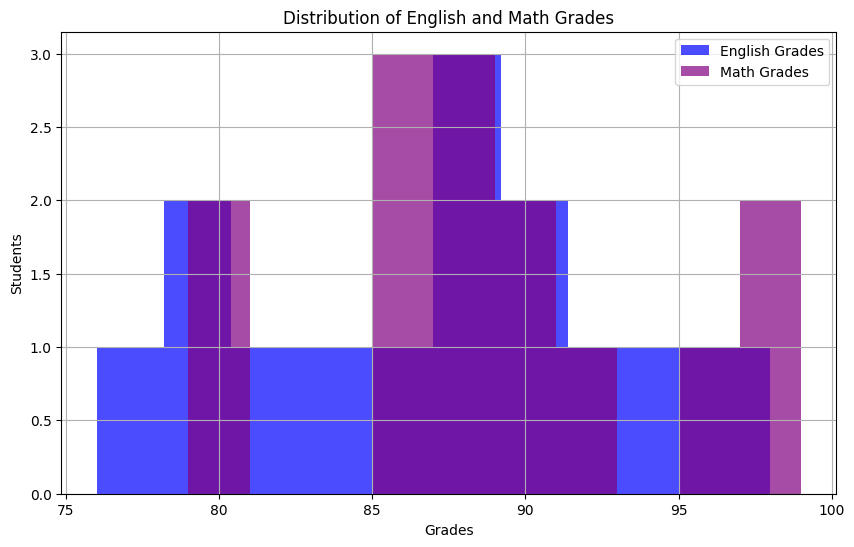

In [57]:
# Let's use matplotlib to display a histogram of the grades distribution
# Histograms are useful for seeing the distribution of the students grades
plt.figure(figsize=(10, 6))
plt.hist(df_studentGrades['englishGrade'], bins=10, alpha=0.7, label='English Grades', color='blue')

# Step 1: Use the line above as reference to create a histogram for the math grades
# (1 mark)
#plt.title('Distribution of English and Math Grades')
plt.hist(df_studentGrades['mathGrade'], bins=10, alpha=0.7, label='Math Grades', color='purple')

# Step 2: Ensure that your plot is descriptive, so use labels (x and y axis), a title, and a legend.
# Hint: Use the matplotlib .legend(loc='<location>') to add and place the legend.
# You can use 'upper left', 'upper right', 'lower left', and 'lower right' to specify the location.
# (4 marks)
plt.title('Distribution of English and Math Grades')
plt.xlabel('Grades')
plt.ylabel('Students')
plt.legend(loc='upper right')
plt.grid(True)

# Step 3: Use the .savefig('<image_title>'.png) to output an image file of the histogram.
# Please be sure to use a descriptive title!
# (1 mark)
plt.savefig('grades_english_math.png')

plt.show()

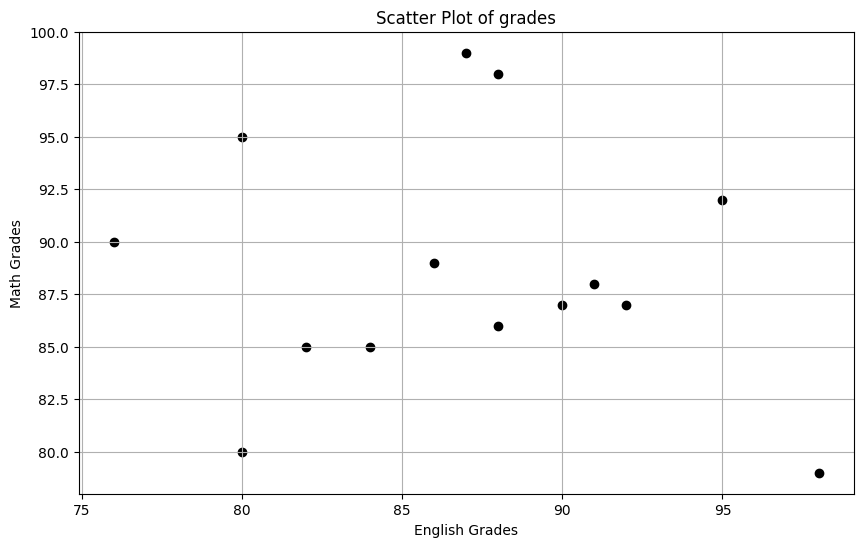

In [58]:
# Let's also use matplotlib to display a scatter plot of English vs. Math grades
# Scatter plots are useful for seeing the relationship between two variables
plt.figure(figsize=(10, 6))

# Step 1: Use .scatter(x_data, y_data) to create a scatter plot using the English grades on the x-axis, and Math grades on the y-axis
# (2 mark)
plt.scatter(df_studentGrades['englishGrade'], df_studentGrades['mathGrade'], color='black')

# Step 1: Properly label the x and y axes as well as the title of your plot.
# (3 marks)
plt.title('Scatter Plot of grades')
plt.xlabel('English Grades')
plt.ylabel('Math Grades')
plt.grid(True)

# Step 2: Output an image file for the scatter plot with a descriptive file name
# (1 mark)
plt.savefig('grades_scatter.png')

plt.show()

In [ ]:
# From the scatter plot, is there a relationship between the Math and English grades?
# (1 mark)
# No relationship exists as points appear randomly